## 範例重點
### 學習在模型開始前檢查各個環節
1. 是否有 GPU 資源
2. 將前處理轉為函式，統一處理訓練、驗證與測試集
3. 將超參數變數化，易於重複使用函式、模型等

In [1]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

Sun Jul 05 17:35:11 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.77                 Driver Version: 390.77                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 105... WDDM  | 00000000:01:00.0  On |                  N/A |
| 29%   45C    P8    N/A /  75W |   1691MiB /  4096MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 308s 2us/step


In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 5s 24ms/step - loss: 1.9314 - accuracy: 0.3078 - val_loss: 1.7591 - val_accuracy: 0.3688
Epoch 2/100
196/196 [==============================] - 4s 19ms/step - loss: 1.6996 - accuracy: 0.3940 - val_loss: 1.6417 - val_accuracy: 0.4074
Epoch 3/100
196/196 [==============================] - 4s 19ms/step - loss: 1.6244 - accuracy: 0.4201 - val_loss: 1.6217 - val_accuracy: 0.4325
Epoch 4/100
196/196 [==============================] - 4s 18ms/step - loss: 1.5586 - accuracy: 0.4436 - val_loss: 1.5487 - val_accuracy: 0.4519
Epoch 5/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5163 - accuracy: 0.4594 - val_loss: 1.5142 - val_accuracy: 0.4543
Epoch 6/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4732 - accuracy: 0.4745 - val_loss: 1.5140 - val_accuracy: 0.4589
Epoch 7/100
196/196 [==============================] - 4s 20ms/step - loss: 1.4396 - accuracy: 0.4892 - val_loss: 1.4712 - val_accuracy:

196/196 [==============================] - 4s 18ms/step - loss: 0.5779 - accuracy: 0.7938 - val_loss: 1.9683 - val_accuracy: 0.5154
Epoch 58/100
196/196 [==============================] - 4s 18ms/step - loss: 0.5621 - accuracy: 0.7986 - val_loss: 1.9460 - val_accuracy: 0.5212
Epoch 59/100
196/196 [==============================] - 3s 18ms/step - loss: 0.5347 - accuracy: 0.8091 - val_loss: 1.9801 - val_accuracy: 0.5232
Epoch 60/100
196/196 [==============================] - 4s 18ms/step - loss: 0.5475 - accuracy: 0.8046 - val_loss: 2.0648 - val_accuracy: 0.5129
Epoch 61/100
196/196 [==============================] - 3s 18ms/step - loss: 0.5299 - accuracy: 0.8099 - val_loss: 2.0869 - val_accuracy: 0.5169
Epoch 62/100
196/196 [==============================] - 3s 18ms/step - loss: 0.5347 - accuracy: 0.8078 - val_loss: 2.1108 - val_accuracy: 0.5120
Epoch 63/100
196/196 [==============================] - 4s 18ms/step - loss: 0.5111 - accuracy: 0.8189 - val_loss: 2.2080 - val_accuracy: 0.513

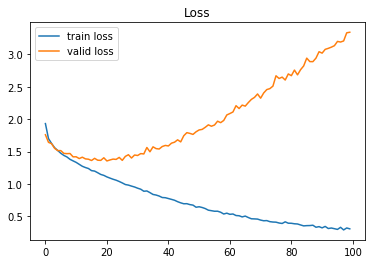

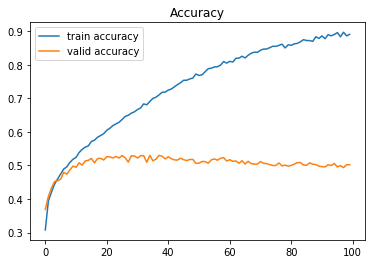

In [13]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度